# Cyclic Distributions

Cyclic distributions can be useful to simulate pulsar signals. It would be interesting, and fun, to try to come up with analytical expressions that result in these type of distributions.

## General Constraints

Let $f(x)$ be some distribution on $x \in (-\infty, +\infty)$ such that $f(x) = f(x + 2\pi)$ and $f(x) \ge 0$ then it is a cyclic distribution.

I am mostly interested in symmetric single-peaked distributions for now. So, I add the following constraints (hopefully without loss of much generality) to normalize these distributions for easier comparisons:

$$\int_{-\pi}^{\pi} f(x) \,\, \mathrm{d}x = 1$$

$$f(x) = f(-x)$$

$$f'(x) \le 0 \qquad \mathrm{for} \, x \in [0, \pi]$$

This should constrain us to distributions that peak at $f(0)$, then monotonically decrease outward symmetrically. Since most distributions will have tunable shape parameters, we normalize via $0 \le f(x) \le 1$ and $f(0) = 1$.


In [1]:
%matplotlib inline

import ipywidgets as widgets
import numpy as np
import scipy.integrate
import scipy.optimize
import matplotlib.pyplot as plt

np.seterr(over='ignore')

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=16)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [2]:
def shape_parameter(fn, bracket=[0, 30]):
    def root_func(a, fn):
        r, *_ = scipy.integrate.quad(fn, -np.pi, np.pi, args=(a,))
        return 1.0 - r

    root = scipy.optimize.root_scalar(root_func, args=(fn,), bracket=bracket)
    if not root.converged:
        print(root)
        return None
    return root.root


def multiple_formatter(denominator=2, number=np.pi, latex=r"\pi"):
    def gcd(a, b):
        while b:
            a, b = b, a % b
        return a

    def _multiple_formatter(x, pos):
        den = denominator
        num = np.int64(np.rint(den*x/number))
        com = gcd(num, den)
        num, den = int(num/com), int(den/com)
        if den == 1:
            if num == 0:
                return r'$0$'
            if num == 1:
                return r'${}$'.format(latex)
            elif num == -1:
                return r'$-{}$'.format(latex)
            else:
                return r'${}{}$'.format(num, latex)
        else:
            if num == 1:
                return r'$\frac{{{}}}{{{}}}$'.format(latex, den)
            elif num == -1:
                return r'$\frac{{-{}}}{{{}}}$'.format(latex, den)
            else:
                return r'$\frac{{{}{}}}{{{}}}$'.format(num, latex, den)

    return _multiple_formatter


class Multiple:
    def __init__(self, denominator=2, number=np.pi, latex=r"\pi"):
        self.denominator = denominator
        self.number = number
        self.latex = latex

    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)

    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator,
                                                    self.number,
                                                    self.latex))


def plot_distribution(f, a, m=1, title=None):
    t = np.linspace(-m*np.pi, +m*np.pi, 4097)
    
    plt.close(0)
    fig = plt.figure(0, figsize=(9, 4.5), tight_layout=True)
    ax = fig.subplots(1, 1)
    ax.plot(t, f(t, a), 'k-')
    ax.set_xlabel('$x$')
    ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))

    if title is not None:
        ax.set_title(title, pad=10)

    plt.show()

### Cosine raised to a power

A simple function that comes to mind is $f(x) = \left|\cos{x}\right|^a$. This simplifies to
$$f(x) = \left(\frac{1+\cos{x}}{2}\right)^a$$

In [3]:
def cos_power(x, a):
    return ((1 + np.cos(x))/2)**a

cos_power.name = "Cosine Power"

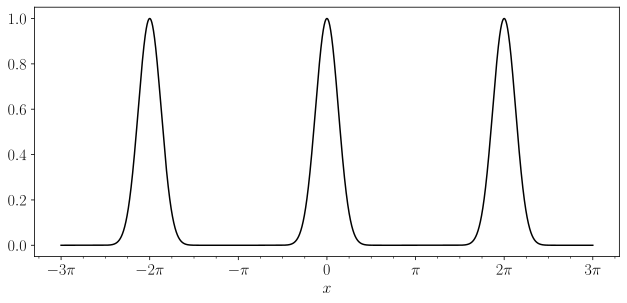

In [4]:
plot_distribution(cos_power, shape_parameter(cos_power), m=3)

### von Mises distribution

The [von Mises distribution](https://en.wikipedia.org/wiki/Von_Mises_distribution),

$$f(x) = e^{a (\cos{x} - 1)}$$

is a maximum entropy distribution on the circle.

In [5]:
def von_mises(x, a):
    return np.exp(a * (np.cos(x) - 1))

von_mises.name = "von Mises"

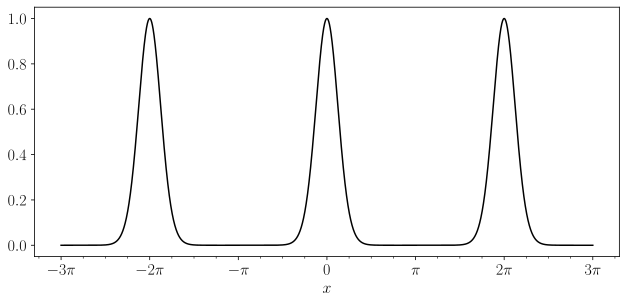

In [6]:
plot_distribution(von_mises, shape_parameter(von_mises), m=3)

### Any distribution with $\tan{(x/2)}$ as argument

If we take any probability distribution with infinite support from $(-\infty, +\infty)$, we can simply replace the argument with $\tan(x/2)$ to get a cyclic version of the distribution!

1. Normal Distribution: $$f(x) = \exp{\left(-a \tan^2\left(\frac{x}{2}\right)\right)}$$
   
2. Cauchy Distribution: $$f(x) = \frac{1}{1 + a \tan^2\left(\frac{x}{2}\right)}$$
   
3. Logistic Distribution: $$f(x) = \operatorname{sech}^2{\left[a\tan^2\left(\frac{x}{2}\right)\right]}$$

In [7]:
def normal_tan(x, a):
    y = np.tan(x/2)
    return np.exp(-a*y**2)

normal_tan.name = "Normal (Tanned)"

def cauchy_tan(x, a):
    y = np.tan(x/2)
    return 1/(1 + a*y**2)

cauchy_tan.name = "Cauchy (Tanned)"

def logistic_tan(x, a):
    y = np.tan(x/2)
    return (1 / np.cosh(a*y))**2

logistic_tan.name = "Logistic (Tanned)"

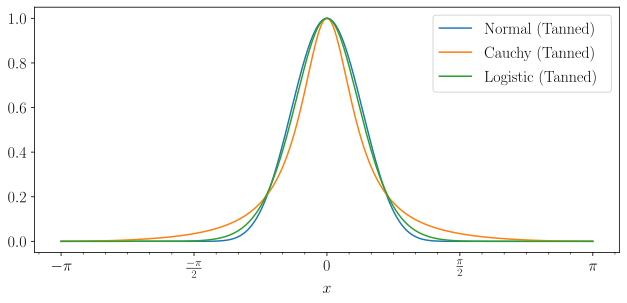

In [8]:
t = np.linspace(-np.pi, +np.pi, 4097)

plt.close(0)
fig = plt.figure(0, figsize=(9, 4.5), tight_layout=True)
ax = fig.subplots(1, 1)

for f in [normal_tan, cauchy_tan, logistic_tan]:
    a = shape_parameter(f)
    ax.plot(t, f(t, a), '-', label=f.name)

ax.set_xlabel('$x$')
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi/2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi/12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
ax.legend()
plt.show()